In [ ]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = "Top100.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Unnamed: 0,Ticker
0,0,LLY
1,1,PGR
2,2,GWW
3,3,META
4,4,ORCL


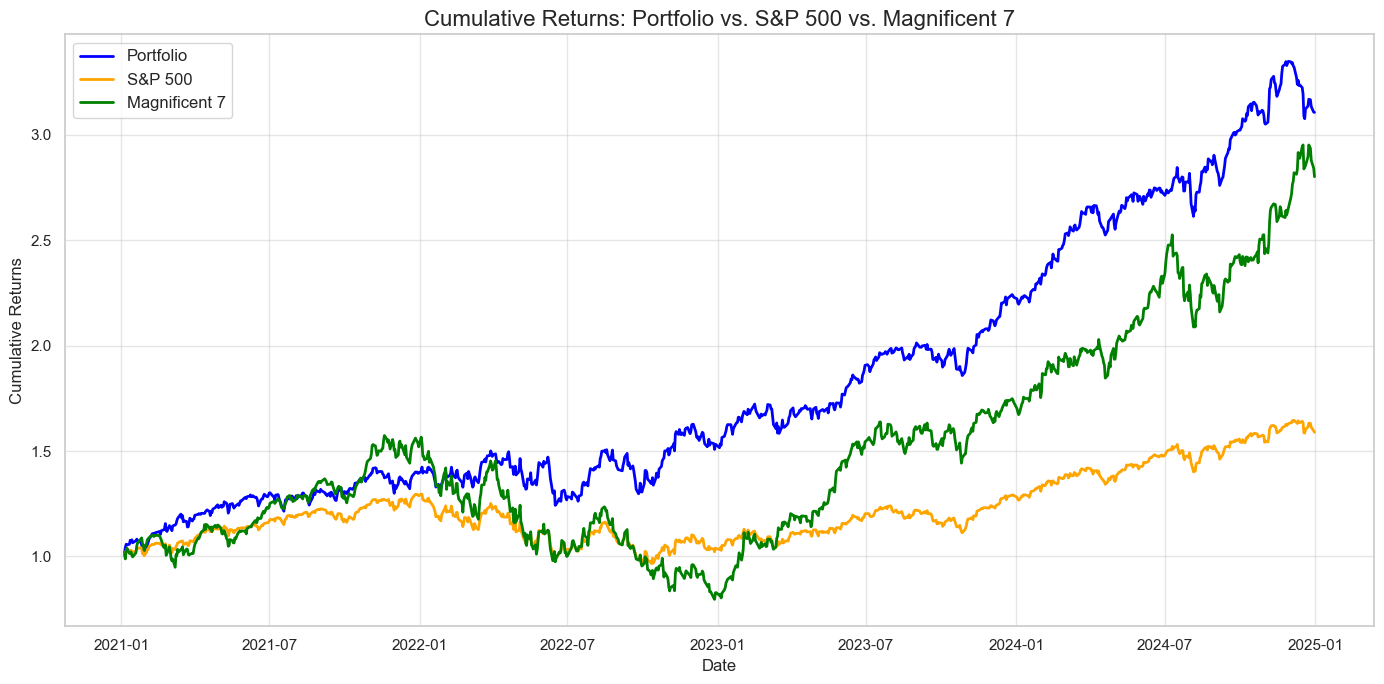

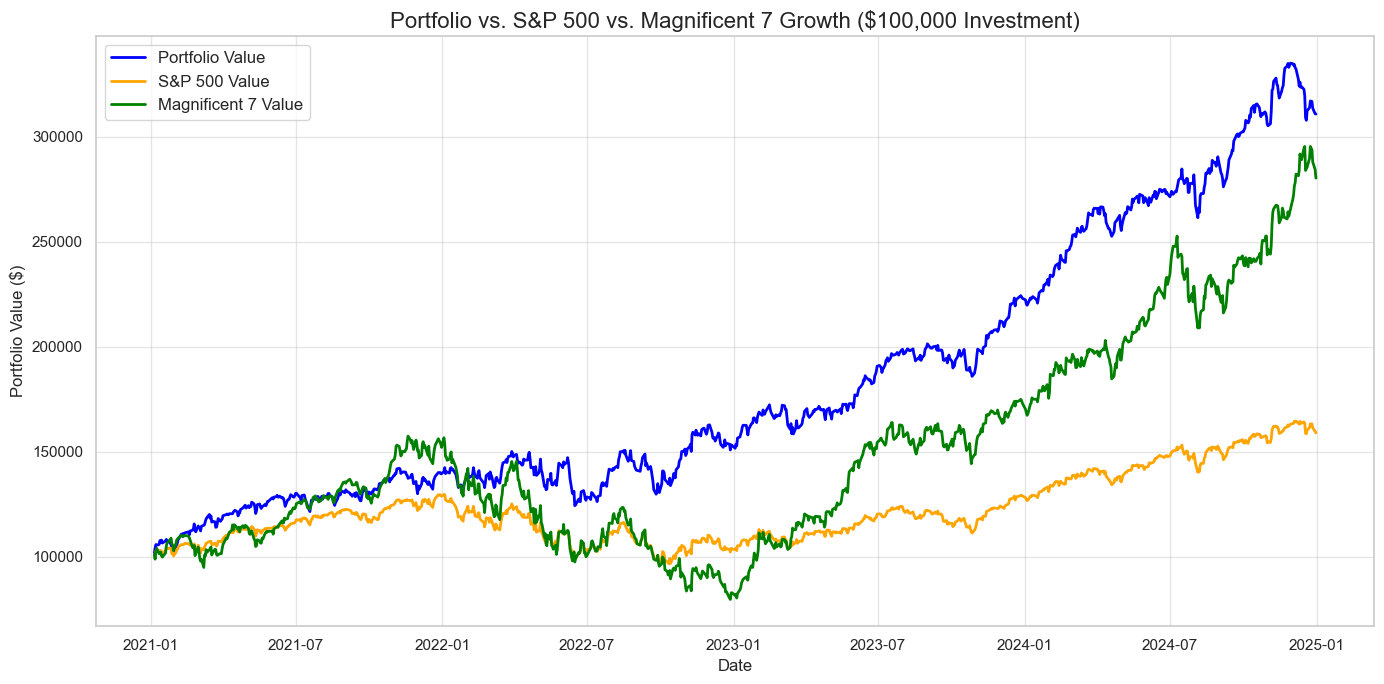

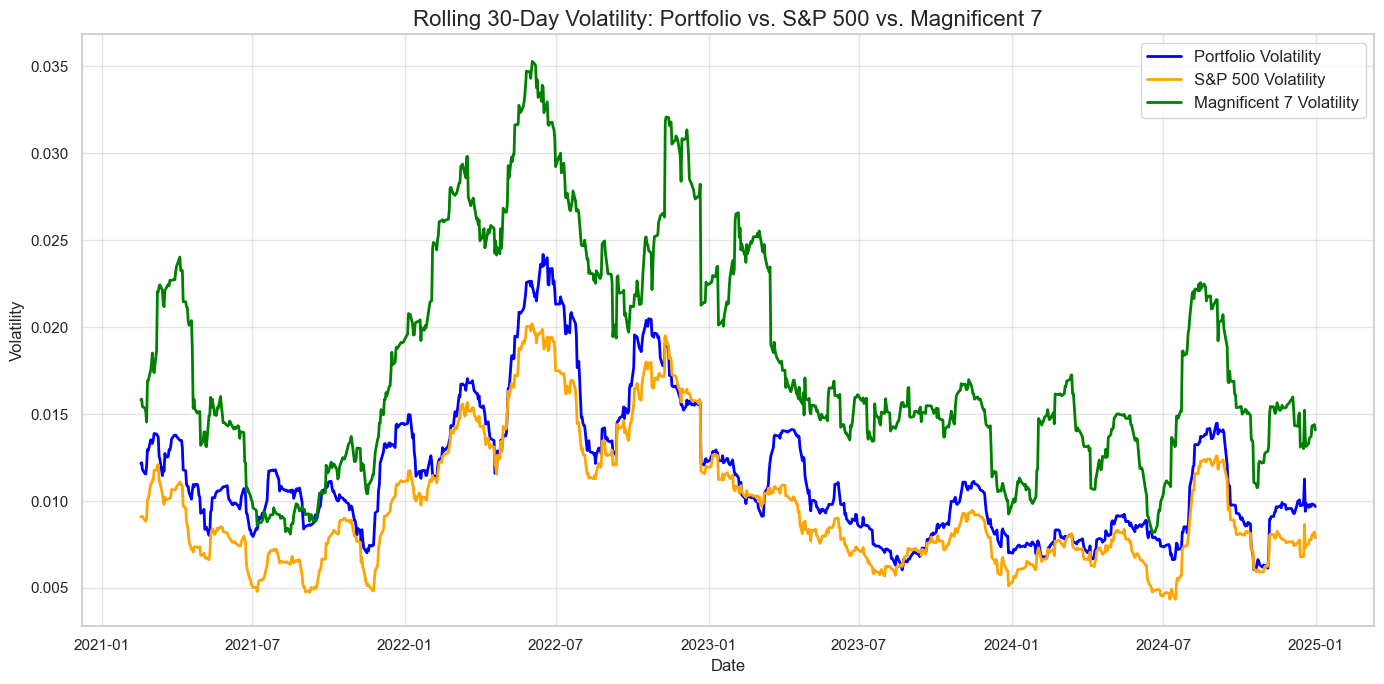

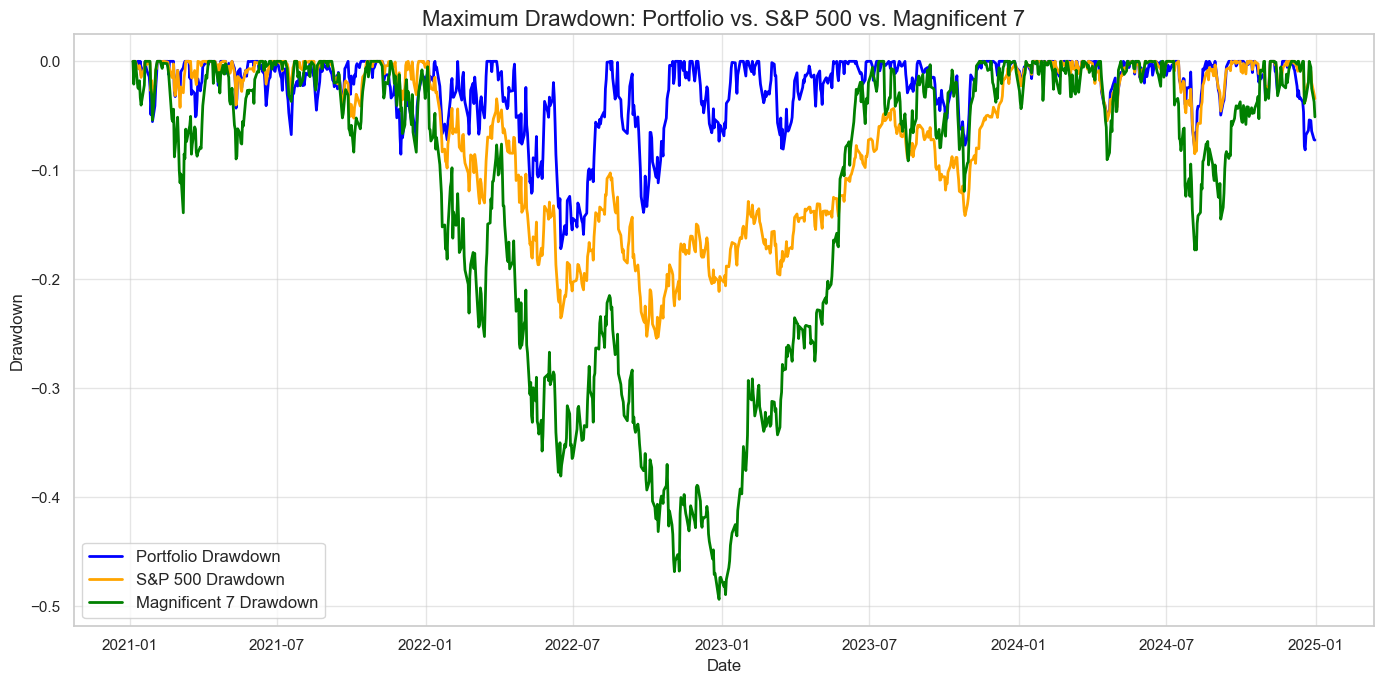

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load tickers from CSV file
file_path = "Top100.csv"  # Update this with the correct path if needed
df = pd.read_csv(file_path)
tickers = df["Ticker"].tolist()

# Add S&P 500 as benchmark
benchmark_ticker = "^GSPC"

# Add Magnificent 7 tickers
magnificent_7 = ["AAPL", "MSFT", "AMZN", "NVDA", "META", "TSLA", "GOOG"]

# Define date range
start_date = "2021-01-01"
end_date = "2025-01-01"

# Fetch stock data
all_tickers = tickers + [benchmark_ticker] + magnificent_7
data = yf.download(all_tickers, start=start_date, end=end_date, progress=False)["Adj Close"]

# Drop missing values
data.dropna(inplace=True)

# Calculate daily returns
returns = data.pct_change().dropna()

# Construct equal-weighted portfolio for main tickers
num_assets = len(tickers)
weights = np.ones(num_assets) / num_assets  # Equal weights

# Portfolio returns (excluding S&P 500 and Magnificent 7)
portfolio_returns = returns[tickers].dot(weights)

# Benchmark (S&P 500) returns
benchmark_returns = returns[benchmark_ticker]

# Magnificent 7 portfolio returns (equal-weighted)
magnificent_7_weights = np.ones(len(magnificent_7)) / len(magnificent_7)
magnificent_7_returns = returns[magnificent_7].dot(magnificent_7_weights)

# Calculate cumulative returns
portfolio_cum_returns = (1 + portfolio_returns).cumprod()
benchmark_cum_returns = (1 + benchmark_returns).cumprod()
magnificent_7_cum_returns = (1 + magnificent_7_returns).cumprod()

# Investment Growth ($100,000 in each)
initial_investment = 100000
portfolio_value = portfolio_cum_returns * initial_investment
benchmark_value = benchmark_cum_returns * initial_investment
magnificent_7_value = magnificent_7_cum_returns * initial_investment

# Visualization
sns.set_theme(style="whitegrid", palette="muted")

# 1. Cumulative Returns: Portfolio vs. S&P 500 vs. Magnificent 7
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cum_returns, label="Portfolio", color="blue", linewidth=2)
plt.plot(benchmark_cum_returns, label="S&P 500", color="orange", linewidth=2)
plt.plot(magnificent_7_cum_returns, label="Magnificent 7", color="green", linewidth=2)
plt.title("Cumulative Returns: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment)
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value, label="Portfolio Value", color="blue", linewidth=2)
plt.plot(benchmark_value, label="S&P 500 Value", color="orange", linewidth=2)
plt.plot(magnificent_7_value, label="Magnificent 7 Value", color="green", linewidth=2)
plt.title("Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7
plt.figure(figsize=(14, 7))
portfolio_volatility = portfolio_returns.rolling(30).std()
benchmark_volatility = benchmark_returns.rolling(30).std()
magnificent_7_volatility = magnificent_7_returns.rolling(30).std()
plt.plot(portfolio_volatility, label="Portfolio Volatility", color="blue", linewidth=2)
plt.plot(benchmark_volatility, label="S&P 500 Volatility", color="orange", linewidth=2)
plt.plot(magnificent_7_volatility, label="Magnificent 7 Volatility", color="green", linewidth=2)
plt.title("Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7
portfolio_drawdown = (portfolio_cum_returns / portfolio_cum_returns.cummax()) - 1
benchmark_drawdown = (benchmark_cum_returns / benchmark_cum_returns.cummax()) - 1
magnificent_7_drawdown = (magnificent_7_cum_returns / magnificent_7_cum_returns.cummax()) - 1

plt.figure(figsize=(14, 7))
plt.plot(portfolio_drawdown, label="Portfolio Drawdown", color="blue", linewidth=2)
plt.plot(benchmark_drawdown, label="S&P 500 Drawdown", color="orange", linewidth=2)
plt.plot(magnificent_7_drawdown, label="Magnificent 7 Drawdown", color="green", linewidth=2)
plt.title("Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


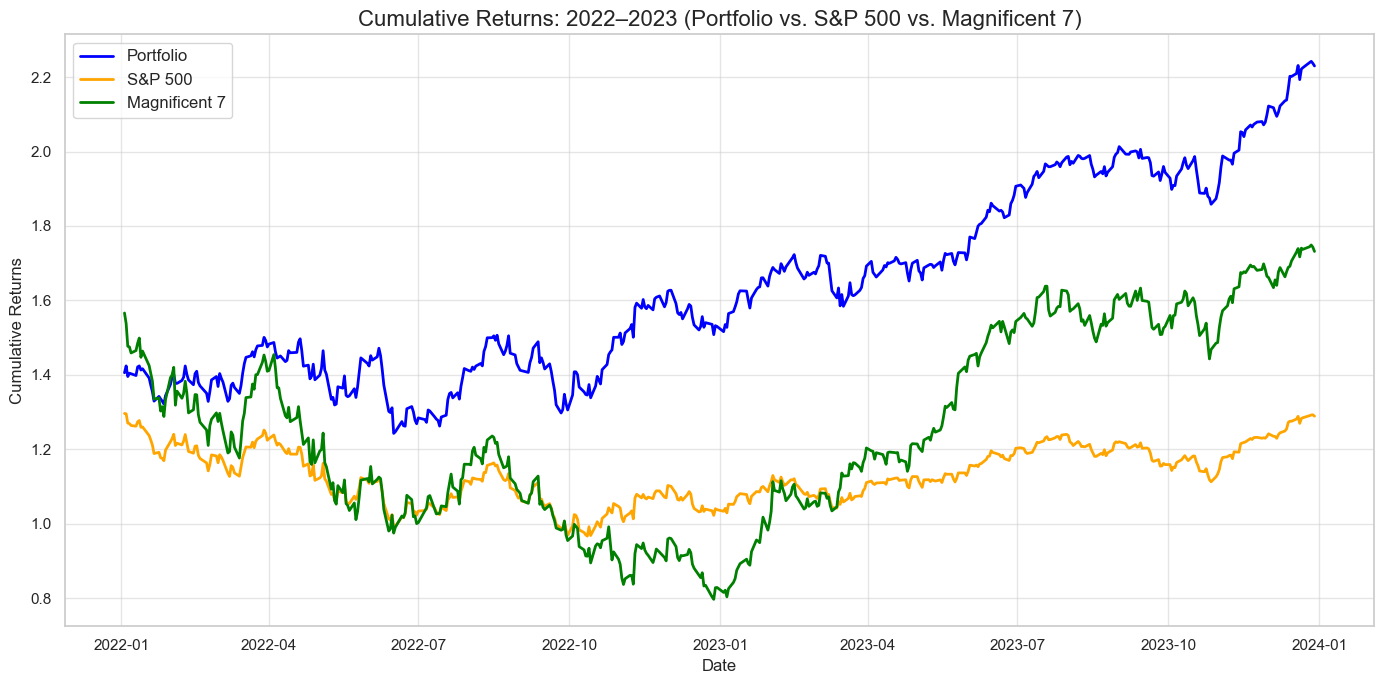

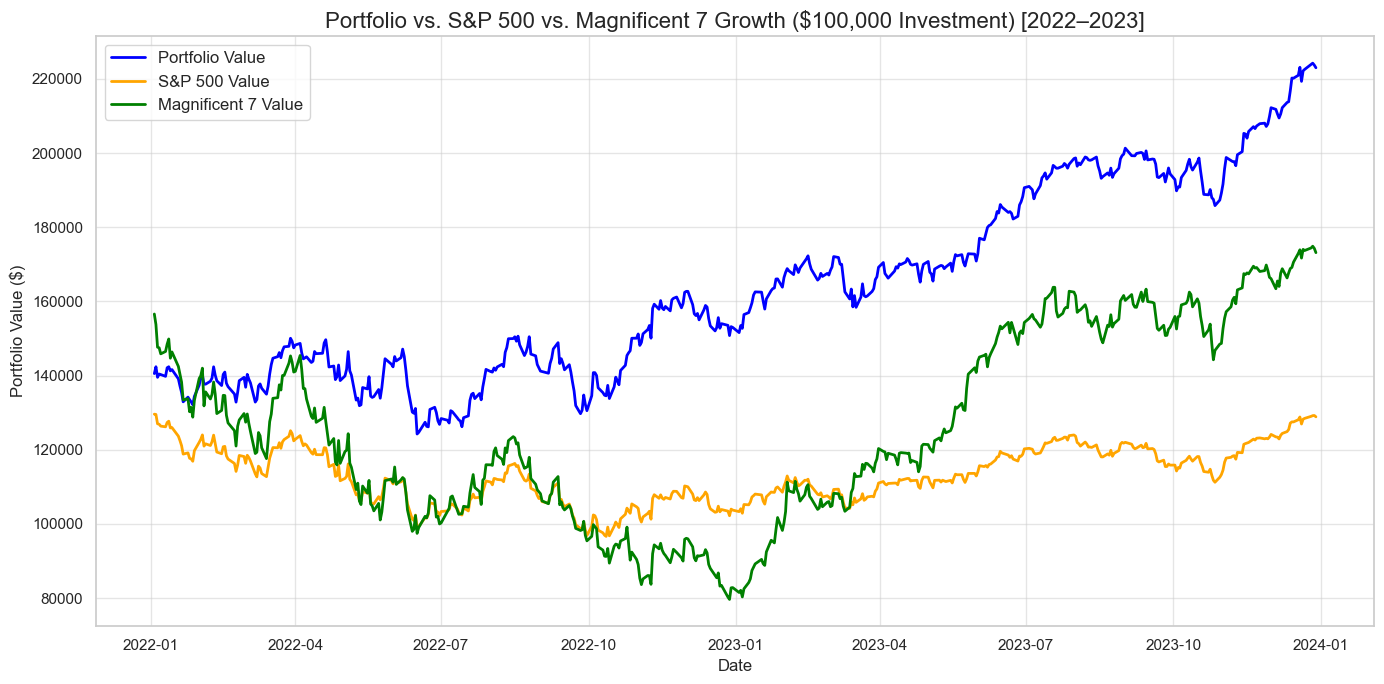

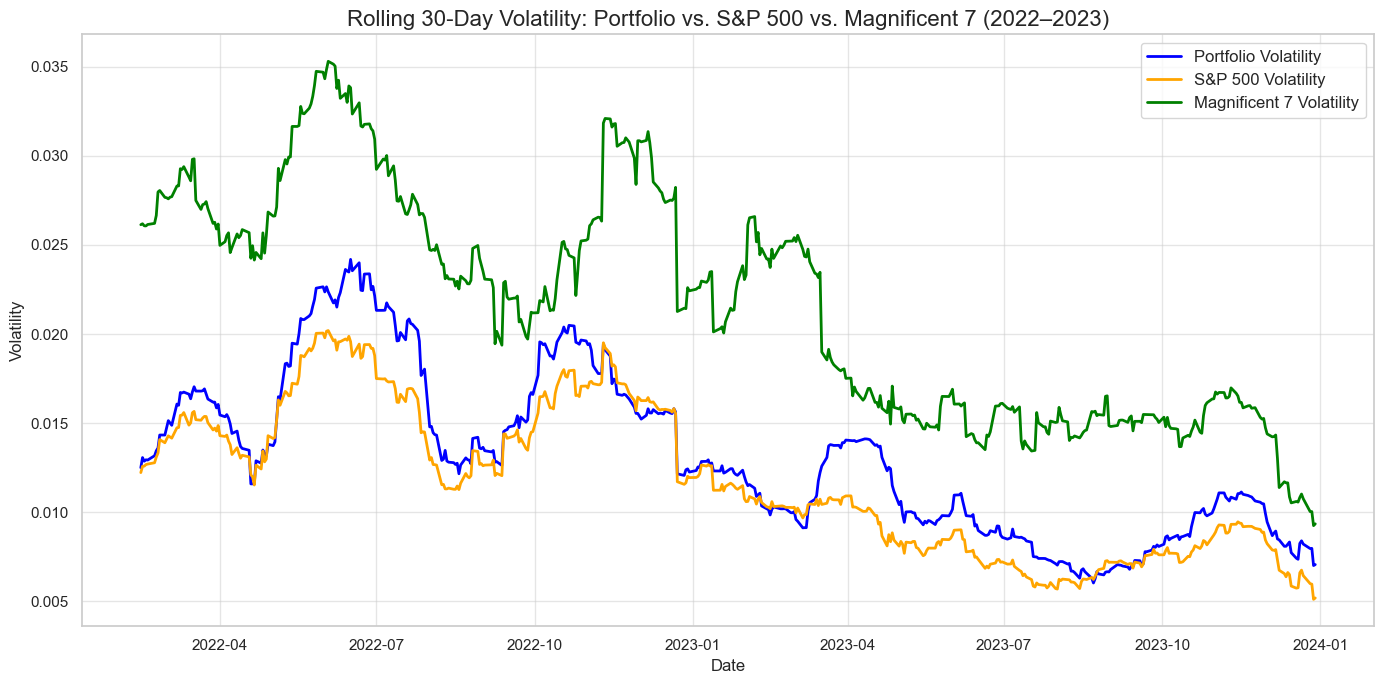

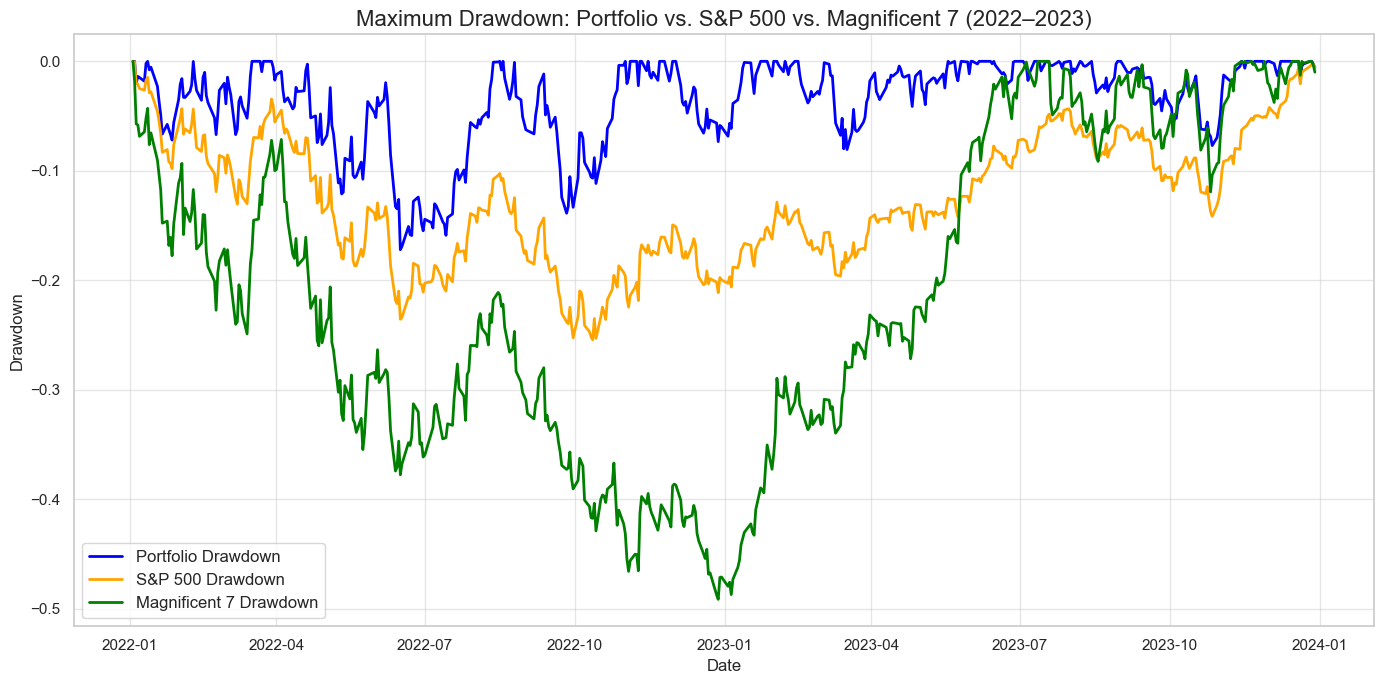

In [10]:
# Filter data for the time frame 2022-2023
start_filter = "2022-01-01"
end_filter = "2023-12-31"

portfolio_cum_returns_filtered = portfolio_cum_returns.loc[start_filter:end_filter]
benchmark_cum_returns_filtered = benchmark_cum_returns.loc[start_filter:end_filter]
magnificent_7_cum_returns_filtered = magnificent_7_cum_returns.loc[start_filter:end_filter]

portfolio_returns_filtered = portfolio_returns.loc[start_filter:end_filter]
benchmark_returns_filtered = benchmark_returns.loc[start_filter:end_filter]
magnificent_7_returns_filtered = magnificent_7_returns.loc[start_filter:end_filter]

# Investment Growth ($100,000 in each)
initial_investment = 100000
portfolio_value_filtered = portfolio_cum_returns_filtered * initial_investment
benchmark_value_filtered = benchmark_cum_returns_filtered * initial_investment
magnificent_7_value_filtered = magnificent_7_cum_returns_filtered * initial_investment

# Visualization
sns.set_theme(style="whitegrid", palette="muted")

# 1. Cumulative Returns for 2022–2023
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cum_returns_filtered, label="Portfolio", color="blue", linewidth=2)
plt.plot(benchmark_cum_returns_filtered, label="S&P 500", color="orange", linewidth=2)
plt.plot(magnificent_7_cum_returns_filtered, label="Magnificent 7", color="green", linewidth=2)
plt.title("Cumulative Returns: 2022–2023 (Portfolio vs. S&P 500 vs. Magnificent 7)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment) for 2022–2023
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_filtered, label="Portfolio Value", color="blue", linewidth=2)
plt.plot(benchmark_value_filtered, label="S&P 500 Value", color="orange", linewidth=2)
plt.plot(magnificent_7_value_filtered, label="Magnificent 7 Value", color="green", linewidth=2)
plt.title("Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment) [2022–2023]", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7 (2022–2023)
plt.figure(figsize=(14, 7))
portfolio_volatility_filtered = portfolio_returns_filtered.rolling(30).std()
benchmark_volatility_filtered = benchmark_returns_filtered.rolling(30).std()
magnificent_7_volatility_filtered = magnificent_7_returns_filtered.rolling(30).std()
plt.plot(portfolio_volatility_filtered, label="Portfolio Volatility", color="blue", linewidth=2)
plt.plot(benchmark_volatility_filtered, label="S&P 500 Volatility", color="orange", linewidth=2)
plt.plot(magnificent_7_volatility_filtered, label="Magnificent 7 Volatility", color="green", linewidth=2)
plt.title("Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7 (2022–2023)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7 (2022–2023)
portfolio_drawdown_filtered = (portfolio_cum_returns_filtered / portfolio_cum_returns_filtered.cummax()) - 1
benchmark_drawdown_filtered = (benchmark_cum_returns_filtered / benchmark_cum_returns_filtered.cummax()) - 1
magnificent_7_drawdown_filtered = (magnificent_7_cum_returns_filtered / magnificent_7_cum_returns_filtered.cummax()) - 1

plt.figure(figsize=(14, 7))
plt.plot(portfolio_drawdown_filtered, label="Portfolio Drawdown", color="blue", linewidth=2)
plt.plot(benchmark_drawdown_filtered, label="S&P 500 Drawdown", color="orange", linewidth=2)
plt.plot(magnificent_7_drawdown_filtered, label="Magnificent 7 Drawdown", color="green", linewidth=2)
plt.title("Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7 (2022–2023)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

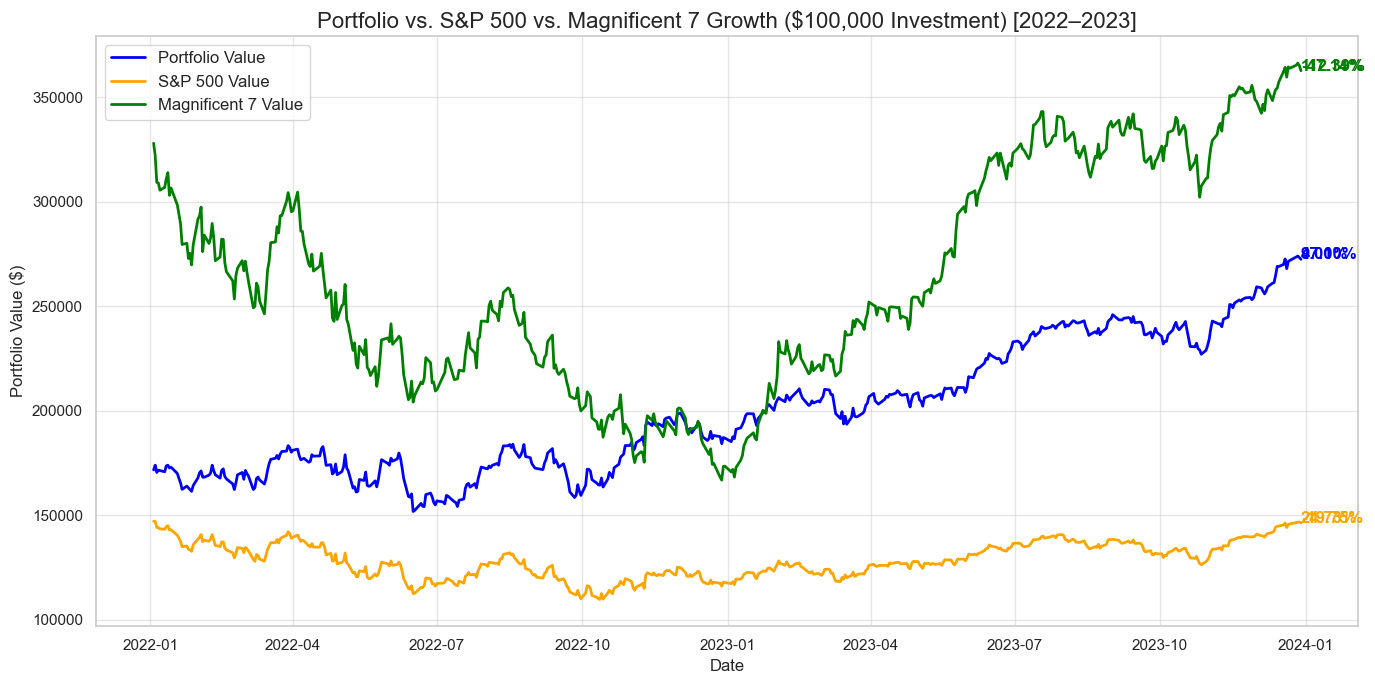

In [8]:
# Function to calculate 1-Year Performance (Total Return for the Year)
def calculate_yearly_return(cum_returns, year):
    start = f"{year}-01-03"  # Approximate start (first trading day)
    end = f"{year}-12-29"  # Last trading day of the year
    return ((cum_returns.loc[end] / cum_returns.loc[start]) - 1) * 100

# Calculate 1-Year Returns for 2022 and 2023
portfolio_return_2022 = calculate_yearly_return(portfolio_cum_returns_filtered, 2022)
portfolio_return_2023 = calculate_yearly_return(portfolio_cum_returns_filtered, 2023)

benchmark_return_2022 = calculate_yearly_return(benchmark_cum_returns_filtered, 2022)
benchmark_return_2023 = calculate_yearly_return(benchmark_cum_returns_filtered, 2023)

magnificent_7_return_2022 = calculate_yearly_return(magnificent_7_cum_returns_filtered, 2022)
magnificent_7_return_2023 = calculate_yearly_return(magnificent_7_cum_returns_filtered, 2023)

# Investment Growth ($100,000 in each) for 2022-2023
initial_investment = 100000
portfolio_value_filtered = portfolio_cum_returns_filtered * initial_investment
benchmark_value_filtered = benchmark_cum_returns_filtered * initial_investment
magnificent_7_value_filtered = magnificent_7_cum_returns_filtered * initial_investment

# Plot Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment) for 2022–2023
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_filtered, label="Portfolio Value", color="blue", linewidth=2)
plt.plot(benchmark_value_filtered, label="S&P 500 Value", color="orange", linewidth=2)
plt.plot(magnificent_7_value_filtered, label="Magnificent 7 Value", color="green", linewidth=2)

# Annotate 1-Year Performance for Each Year
for year in [2022, 2023]:
    year_str = str(year)
    
    plt.text(portfolio_value_filtered.index[-1], portfolio_value_filtered.iloc[-1],
             f"{calculate_yearly_return(portfolio_cum_returns_filtered, year):.2f}%", 
             fontsize=12, color="blue", weight='bold')
    
    plt.text(benchmark_value_filtered.index[-1], benchmark_value_filtered.iloc[-1],
             f"{calculate_yearly_return(benchmark_cum_returns_filtered, year):.2f}%", 
             fontsize=12, color="orange", weight='bold')

    plt.text(magnificent_7_value_filtered.index[-1], magnificent_7_value_filtered.iloc[-1],
             f"{calculate_yearly_return(magnificent_7_cum_returns_filtered, year):.2f}%", 
             fontsize=12, color="green", weight='bold')

plt.title("Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment) [2022–2023]", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

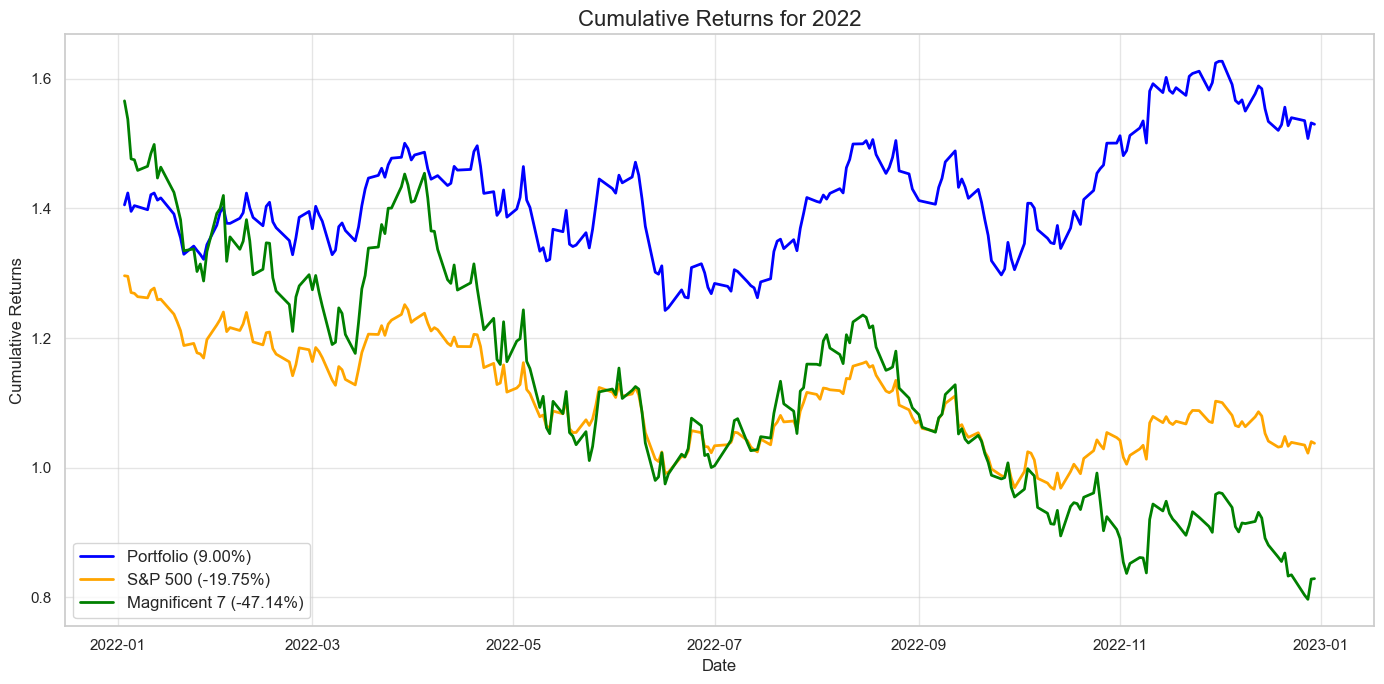

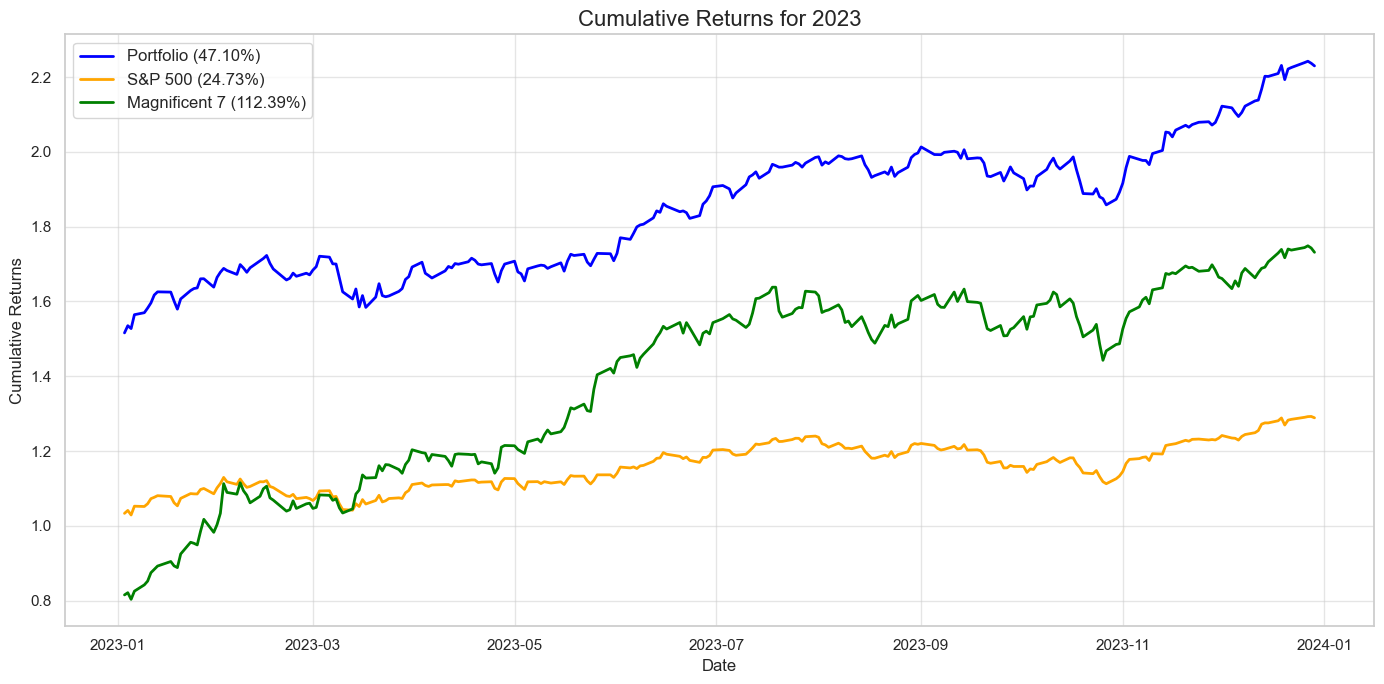

In [18]:
# Function to calculate total return in a specific year
def calculate_yearly_return(cum_returns, year):
    start = f"{year}-01-03"  # First trading day
    end = f"{year}-12-29"  # Last trading day
    return ((cum_returns.loc[end] / cum_returns.loc[start]) - 1) * 100

# Function to filter data for a specific year
def filter_year_data(cum_returns, year):
    return cum_returns.loc[f"{year}-01-01":f"{year}-12-31"]

# Analyze 2022 Performance
portfolio_2022 = filter_year_data(portfolio_cum_returns, 2022)
benchmark_2022 = filter_year_data(benchmark_cum_returns, 2022)
magnificent_7_2022 = filter_year_data(magnificent_7_cum_returns, 2022)

portfolio_return_2022 = calculate_yearly_return(portfolio_cum_returns, 2022)
benchmark_return_2022 = calculate_yearly_return(benchmark_cum_returns, 2022)
magnificent_7_return_2022 = calculate_yearly_return(magnificent_7_cum_returns, 2022)

# Analyze 2023 Performance
portfolio_2023 = filter_year_data(portfolio_cum_returns, 2023)
benchmark_2023 = filter_year_data(benchmark_cum_returns, 2023)
magnificent_7_2023 = filter_year_data(magnificent_7_cum_returns, 2023)

portfolio_return_2023 = calculate_yearly_return(portfolio_cum_returns, 2023)
benchmark_return_2023 = calculate_yearly_return(benchmark_cum_returns, 2023)
magnificent_7_return_2023 = calculate_yearly_return(magnificent_7_cum_returns, 2023)

# Visualization for 2022 Performance
plt.figure(figsize=(14, 7))
plt.plot(portfolio_2022, label=f"Portfolio ({portfolio_return_2022:.2f}%)", color="blue", linewidth=2)
plt.plot(benchmark_2022, label=f"S&P 500 ({benchmark_return_2022:.2f}%)", color="orange", linewidth=2)
plt.plot(magnificent_7_2022, label=f"Magnificent 7 ({magnificent_7_return_2022:.2f}%)", color="green", linewidth=2)
plt.title("Cumulative Returns for 2022", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Visualization for 2023 Performance
plt.figure(figsize=(14, 7))
plt.plot(portfolio_2023, label=f"Portfolio ({portfolio_return_2023:.2f}%)", color="blue", linewidth=2)
plt.plot(benchmark_2023, label=f"S&P 500 ({benchmark_return_2023:.2f}%)", color="orange", linewidth=2)
plt.plot(magnificent_7_2023, label=f"Magnificent 7 ({magnificent_7_return_2023:.2f}%)", color="green", linewidth=2)
plt.title("Cumulative Returns for 2023", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


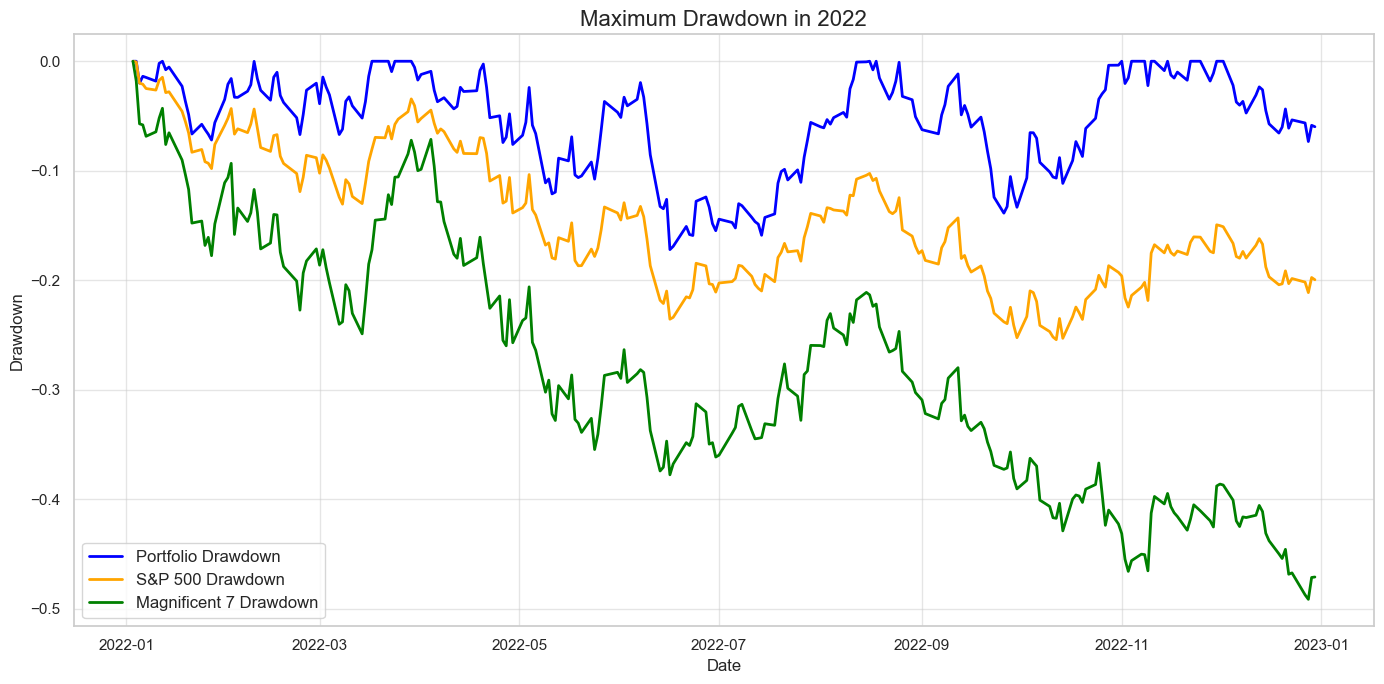

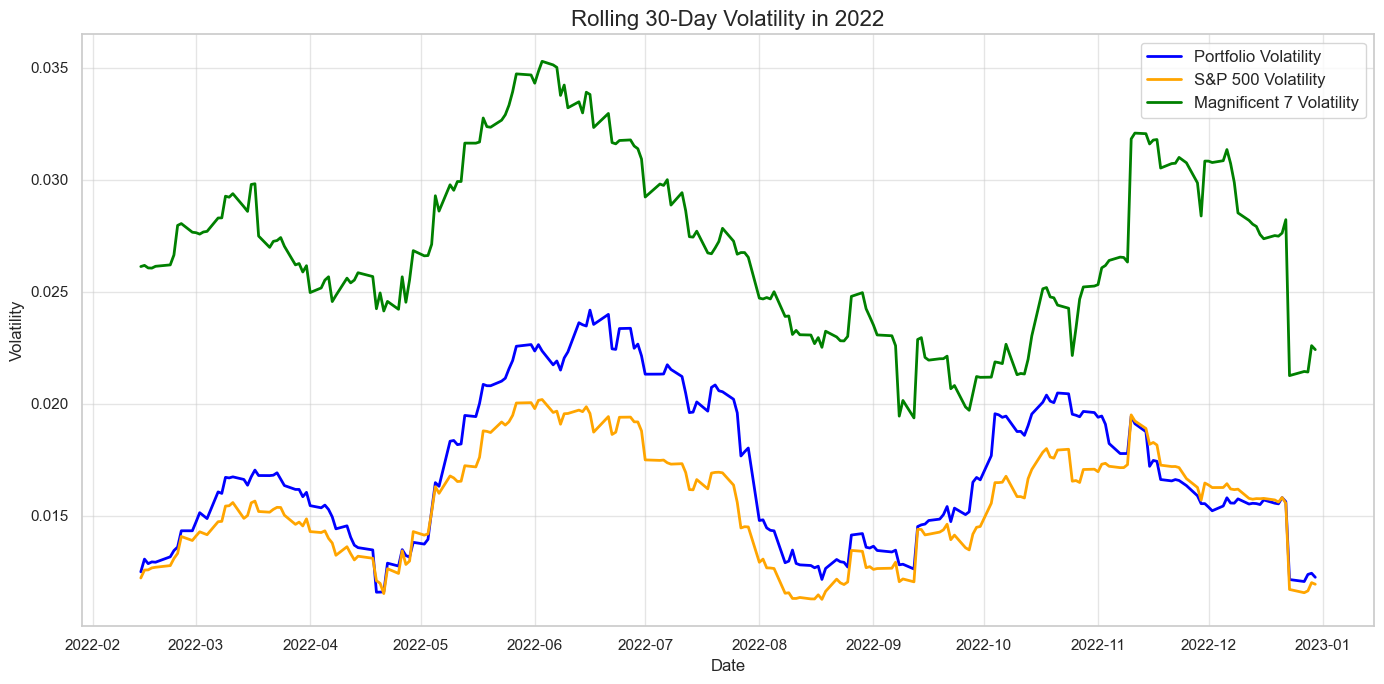

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



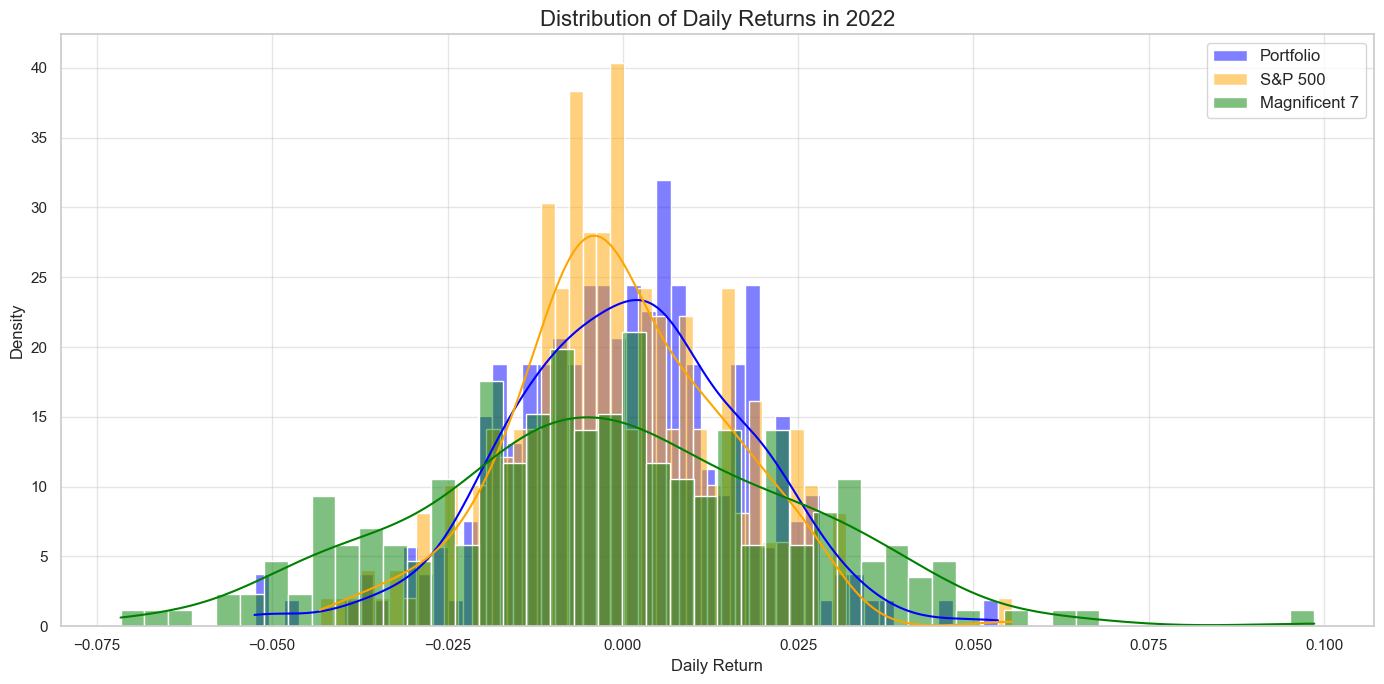

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Function to calculate Value at Risk (VaR) and Conditional Value at Risk (CVaR)
def calculate_var_cvar(returns, confidence_level=0.95):
    var = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns <= var].mean()
    return var, cvar

# Filter returns for 2022
portfolio_returns_2022 = portfolio_returns.loc["2022-01-01":"2022-12-31"]
benchmark_returns_2022 = benchmark_returns.loc["2022-01-01":"2022-12-31"]
magnificent_7_returns_2022 = magnificent_7_returns.loc["2022-01-01":"2022-12-31"]

# Compute rolling 30-day volatility
rolling_volatility_2022 = portfolio_returns_2022.rolling(30).std()
benchmark_volatility_2022 = benchmark_returns_2022.rolling(30).std()
magnificent_7_volatility_2022 = magnificent_7_returns_2022.rolling(30).std()

# Compute maximum drawdown
portfolio_drawdown_2022 = (portfolio_cum_returns.loc["2022-01-01":"2022-12-31"] / 
                           portfolio_cum_returns.loc["2022-01-01":"2022-12-31"].cummax()) - 1
benchmark_drawdown_2022 = (benchmark_cum_returns.loc["2022-01-01":"2022-12-31"] / 
                           benchmark_cum_returns.loc["2022-01-01":"2022-12-31"].cummax()) - 1
magnificent_7_drawdown_2022 = (magnificent_7_cum_returns.loc["2022-01-01":"2022-12-31"] / 
                               magnificent_7_cum_returns.loc["2022-01-01":"2022-12-31"].cummax()) - 1

# Compute VaR and CVaR for each strategy in 2022
portfolio_var, portfolio_cvar = calculate_var_cvar(portfolio_returns_2022.dropna())
benchmark_var, benchmark_cvar = calculate_var_cvar(benchmark_returns_2022.dropna())
magnificent_7_var, magnificent_7_cvar = calculate_var_cvar(magnificent_7_returns_2022.dropna())

# Create DataFrame to store statistical metrics for 2022
stats_2022 = pd.DataFrame({
    "Metric": ["Max Drawdown", "Annualized Volatility", "VaR (95%)", "CVaR (95%)"],
    "Portfolio": [portfolio_drawdown_2022.min(), rolling_volatility_2022.mean() * np.sqrt(252), portfolio_var, portfolio_cvar],
    "S&P 500": [benchmark_drawdown_2022.min(), benchmark_volatility_2022.mean() * np.sqrt(252), benchmark_var, benchmark_cvar],
    "Magnificent 7": [magnificent_7_drawdown_2022.min(), magnificent_7_volatility_2022.mean() * np.sqrt(252), magnificent_7_var, magnificent_7_cvar]
})


# Plot Maximum Drawdown for 2022
plt.figure(figsize=(14, 7))
plt.plot(portfolio_drawdown_2022, label="Portfolio Drawdown", color="blue", linewidth=2)
plt.plot(benchmark_drawdown_2022, label="S&P 500 Drawdown", color="orange", linewidth=2)
plt.plot(magnificent_7_drawdown_2022, label="Magnificent 7 Drawdown", color="green", linewidth=2)
plt.title("Maximum Drawdown in 2022", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Rolling 30-Day Volatility for 2022
plt.figure(figsize=(14, 7))
plt.plot(rolling_volatility_2022, label="Portfolio Volatility", color="blue", linewidth=2)
plt.plot(benchmark_volatility_2022, label="S&P 500 Volatility", color="orange", linewidth=2)
plt.plot(magnificent_7_volatility_2022, label="Magnificent 7 Volatility", color="green", linewidth=2)
plt.title("Rolling 30-Day Volatility in 2022", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Distribution of Returns for 2022
plt.figure(figsize=(14, 7))
sns.histplot(portfolio_returns_2022.dropna(), bins=50, kde=True, color="blue", label="Portfolio", stat="density")
sns.histplot(benchmark_returns_2022.dropna(), bins=50, kde=True, color="orange", label="S&P 500", stat="density")
sns.histplot(magnificent_7_returns_2022.dropna(), bins=50, kde=True, color="green", label="Magnificent 7", stat="density")
plt.title("Distribution of Daily Returns in 2022", fontsize=16)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


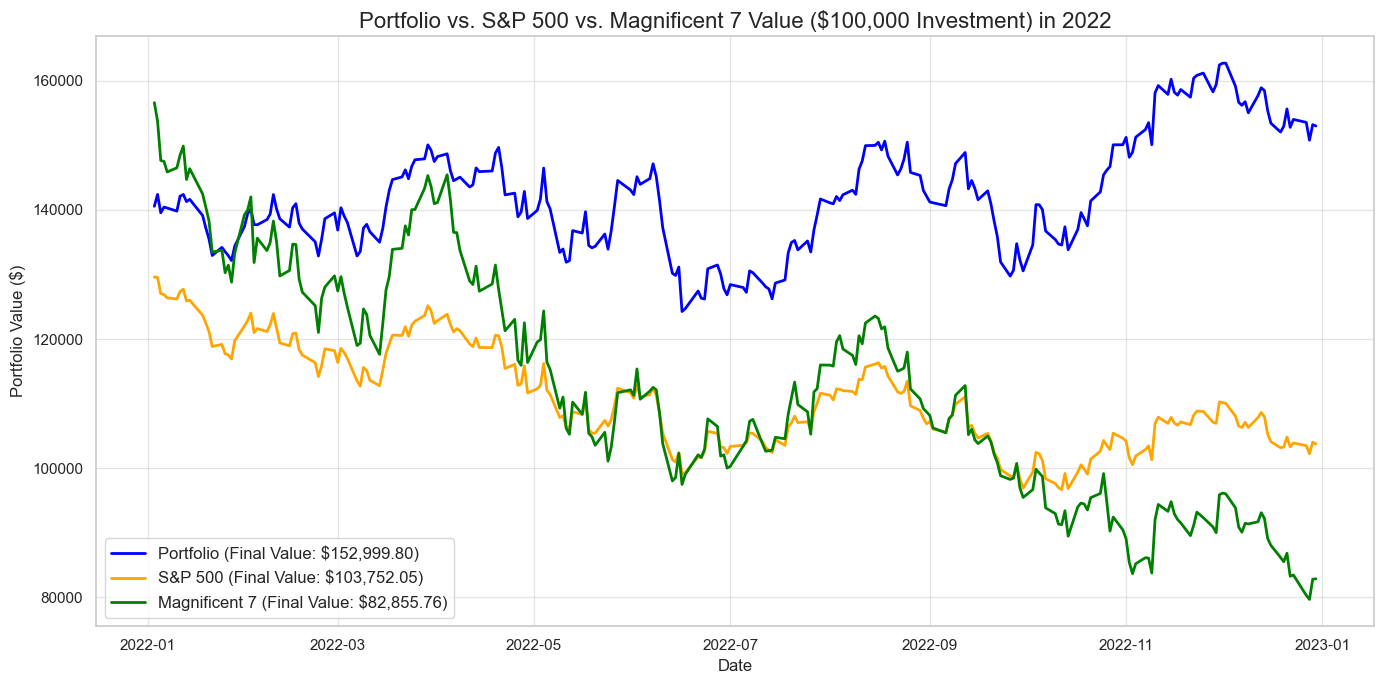

In [21]:

# Filter data for 2022
portfolio_returns_2022 = portfolio_returns.loc["2022-01-01":"2022-12-31"]
benchmark_returns_2022 = benchmark_returns.loc["2022-01-01":"2022-12-31"]
magnificent_7_returns_2022 = magnificent_7_returns.loc["2022-01-01":"2022-12-31"]

portfolio_cum_returns_2022 = portfolio_cum_returns.loc["2022-01-01":"2022-12-31"]
benchmark_cum_returns_2022 = benchmark_cum_returns.loc["2022-01-01":"2022-12-31"]
magnificent_7_cum_returns_2022 = magnificent_7_cum_returns.loc["2022-01-01":"2022-12-31"]

# Compute portfolio value for 2022 with $100,000 investment
initial_investment = 100000
portfolio_value_2022 = portfolio_cum_returns_2022 * initial_investment
benchmark_value_2022 = benchmark_cum_returns_2022 * initial_investment
magnificent_7_value_2022 = magnificent_7_cum_returns_2022 * initial_investment

# Compute rolling 30-day volatility
rolling_volatility_2022 = portfolio_returns_2022.rolling(30).std()
benchmark_volatility_2022 = benchmark_returns_2022.rolling(30).std()
magnificent_7_volatility_2022 = magnificent_7_returns_2022.rolling(30).std()

# Compute maximum drawdown
portfolio_drawdown_2022 = (portfolio_cum_returns_2022 / portfolio_cum_returns_2022.cummax()) - 1
benchmark_drawdown_2022 = (benchmark_cum_returns_2022 / benchmark_cum_returns_2022.cummax()) - 1
magnificent_7_drawdown_2022 = (magnificent_7_cum_returns_2022 / magnificent_7_cum_returns_2022.cummax()) - 1

# Compute Value at Risk (VaR) and Conditional Value at Risk (CVaR)
def calculate_var_cvar(returns, confidence_level=0.95):
    var = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns <= var].mean()
    return var, cvar

portfolio_var, portfolio_cvar = calculate_var_cvar(portfolio_returns_2022.dropna())
benchmark_var, benchmark_cvar = calculate_var_cvar(benchmark_returns_2022.dropna())
magnificent_7_var, magnificent_7_cvar = calculate_var_cvar(magnificent_7_returns_2022.dropna())

# Create DataFrame to store metrics
stats_2022 = pd.DataFrame({
    "Metric": ["Max Drawdown", "Annualized Volatility", "VaR (95%)", "CVaR (95%)", "Final Portfolio Value"],
    "Portfolio": [portfolio_drawdown_2022.min(), rolling_volatility_2022.mean() * np.sqrt(252), portfolio_var, portfolio_cvar, portfolio_value_2022.iloc[-1]],
    "S&P 500": [benchmark_drawdown_2022.min(), benchmark_volatility_2022.mean() * np.sqrt(252), benchmark_var, benchmark_cvar, benchmark_value_2022.iloc[-1]],
    "Magnificent 7": [magnificent_7_drawdown_2022.min(), magnificent_7_volatility_2022.mean() * np.sqrt(252), magnificent_7_var, magnificent_7_cvar, magnificent_7_value_2022.iloc[-1]]
})

# Display DataFrame

# Generate plot legends with calculated values
portfolio_label = f"Portfolio (Final Value: ${portfolio_value_2022.iloc[-1]:,.2f})"
benchmark_label = f"S&P 500 (Final Value: ${benchmark_value_2022.iloc[-1]:,.2f})"
magnificent_7_label = f"Magnificent 7 (Final Value: ${magnificent_7_value_2022.iloc[-1]:,.2f})"

# Plot Portfolio Value in 2022
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_2022, label=portfolio_label, color="blue", linewidth=2)
plt.plot(benchmark_value_2022, label=benchmark_label, color="orange", linewidth=2)
plt.plot(magnificent_7_value_2022, label=magnificent_7_label, color="green", linewidth=2)
plt.title("Portfolio vs. S&P 500 vs. Magnificent 7 Value ($100,000 Investment) in 2022", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\arnav\AppData\Local\Temp\ipykernel_34828\379592823.py:70: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



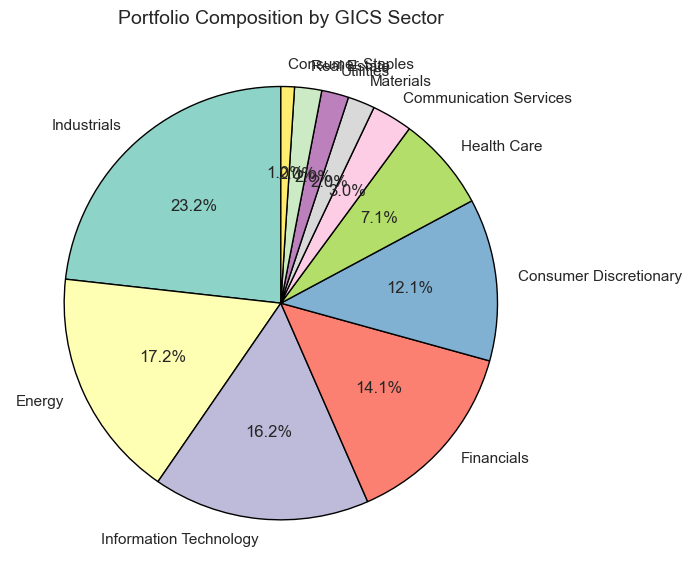

In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# Filter data for 2022
portfolio_returns_2022 = portfolio_returns.loc["2022-01-01":"2022-12-31"]
benchmark_returns_2022 = benchmark_returns.loc["2022-01-01":"2022-12-31"]
magnificent_7_returns_2022 = magnificent_7_returns.loc["2022-01-01":"2022-12-31"]

# Compute financial performance metrics
def calculate_financial_metrics(returns, benchmark_returns):
    """Calculate financial metrics including Sharpe, Sortino, Treynor, and Calmar ratios."""
    risk_free_rate = 0.02 / 252  # Assume 2% annual risk-free rate, daily adjusted
    
    # Annualized return
    annualized_return = (1 + returns.mean())**252 - 1
    
    # Volatility (Annualized)
    volatility = returns.std() * np.sqrt(252)

    # Downside Deviation for Sortino Ratio
    downside_returns = returns[returns < 0]
    downside_std = downside_returns.std() * np.sqrt(252)

    # Beta (systematic risk)
    beta = returns.cov(benchmark_returns) / benchmark_returns.var()

    # Maximum Drawdown
    cumulative_returns = (1 + returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

    # Metrics
    sharpe_ratio = (annualized_return - 0.02) / volatility
    sortino_ratio = (annualized_return - 0.02) / downside_std
    treynor_ratio = (annualized_return - 0.02) / beta
    calmar_ratio = -annualized_return / max_drawdown  # Negative sign to make it positive

    return {
        "Annual Return": annualized_return,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Treynor Ratio": treynor_ratio,
        "Calmar Ratio": calmar_ratio,
        "Max Drawdown": max_drawdown,
    }

# Compute financial metrics for portfolio, S&P 500, and Magnificent 7
portfolio_metrics_2022 = calculate_financial_metrics(portfolio_returns_2022, benchmark_returns_2022)
benchmark_metrics_2022 = calculate_financial_metrics(benchmark_returns_2022, benchmark_returns_2022)
magnificent_7_metrics_2022 = calculate_financial_metrics(magnificent_7_returns_2022, benchmark_returns_2022)

# Create DataFrame for financial metrics
metrics_df = pd.DataFrame([portfolio_metrics_2022, benchmark_metrics_2022, magnificent_7_metrics_2022],
                          index=["Portfolio", "S&P 500", "Magnificent 7"])

# Display DataFrame

# Fetch S&P 500 GICS sector data
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the sector data
table = soup.find('table', {'id': 'constituents'})
df_sp500 = pd.read_html(str(table))[0]

# Create a dictionary mapping ticker symbols to GICS sectors
ticker_sector_mapping = df_sp500.set_index("Symbol")["GICS Sector"].to_dict()

# Map sectors to portfolio tickers
portfolio_sectors = [ticker_sector_mapping.get(ticker, "Unknown") for ticker in tickers]

# Count occurrences of each sector
sector_counts = pd.Series(portfolio_sectors).value_counts()

# Plot portfolio composition by GICS Sector
plt.figure(figsize=(10, 6))
sector_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Set3", wedgeprops={'edgecolor': 'black'})
plt.title("Portfolio Composition by GICS Sector", fontsize=14)
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


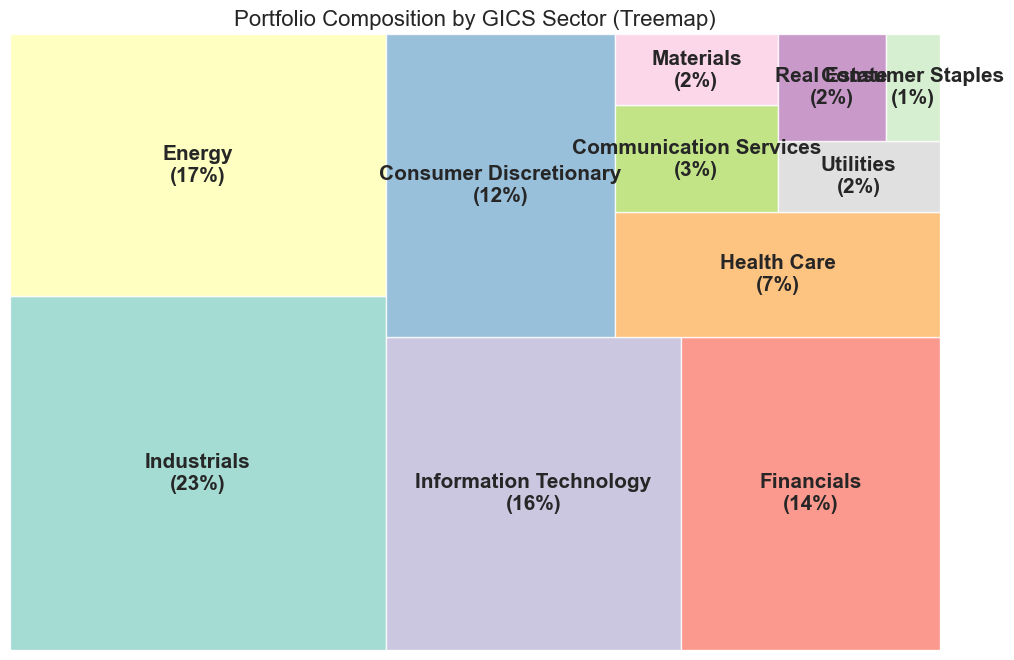

In [55]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for the treemap
colors = sns.color_palette("Set3", len(sector_df))

# Create the treemap
squarify.plot(
    sizes=sector_df["Allocation (%)"], 
    label=[f"{sector}\n({allocation}%)" for sector, allocation in zip(sector_df["Sector"], sector_df["Allocation (%)"])],
    alpha=0.8, 
    color=colors, 
    ax=ax,  # Assign axes explicitly
    text_kwargs={'fontsize': 15, 'weight': 'bold'}
)

# Title
plt.title("Portfolio Composition by GICS Sector (Treemap)", fontsize=16)
plt.axis("off")  # Hide axes
plt.show()
